In [4]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# === Step 1: Load the dataset ===
df = pd.read_csv("patient_data.csv")  # Change path if needed
df

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


In [5]:
# === Step 2: Convert 'Systolic' and 'Diastolic' from range strings to numeric averages ===
def convert_range_to_avg(value):
    try:
        low, high = value.split(' - ')
        return (int(low) + int(high)) / 2
    except:
        return np.nan

df['Systolic'] = df['Systolic'].apply(convert_range_to_avg)
df['Diastolic'] = df['Diastolic'].apply(convert_range_to_avg)

In [6]:
# === Step 3: Drop rows with missing or invalid values ===
df.dropna(inplace=True)

# === Step 4: Encode all categorical columns using LabelEncoder ===
label_encoders = {}

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [8]:
# === Step 5: View the processed dataset (optional) ===
print(df.head())

   C  Age  History  Patient  TakeMedication  Severity  BreathShortness  \
0  1    0        1        0               0         0                0   
1  0    0        1        0               0         0                0   
2  1    1        1        0               0         0                0   
3  0    1        1        0               0         0                0   
4  1    2        1        0               0         0                0   

   VisualChanges  NoseBleeding  Whendiagnoused  Systolic  Diastolic  \
0              0             1               1     115.5       85.5   
1              0             1               1     115.5       85.5   
2              0             1               1     115.5       85.5   
3              0             1               1     115.5       85.5   
4              0             1               1     115.5       85.5   

   ControlledDiet  Stages  
0               0       0  
1               0       0  
2               0       0  
3               

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# === Step 1: Split features and target ===
X = df.drop(columns=['Stages'])  # All columns except target
y = df['Stages']                 # Target column

In [11]:
# === Step 2: Split into train/test sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# === Step 3: Train the classifier ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# === Step 4: Make predictions ===
y_pred = clf.predict(X_test)

# === Step 5: Evaluate performance ===
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207


📉 Confusion Matrix:
 [[87  0  0]
 [ 0 53  0]
 [ 0  0 67]]


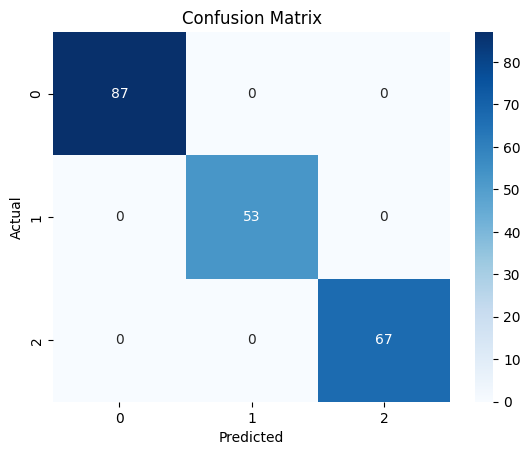

In [14]:
# === Step 6: Optional - Confusion matrix heatmap ===
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [16]:
# 2. Fit model to training data
logreg.fit(X_train, y_train)

# 3. Predict on test data
y_pred_logreg = logreg.predict(X_test)

C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
 #4. Evaluate performance
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"✅ Logistic Regression Accuracy: {accuracy:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_logreg))

✅ Logistic Regression Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



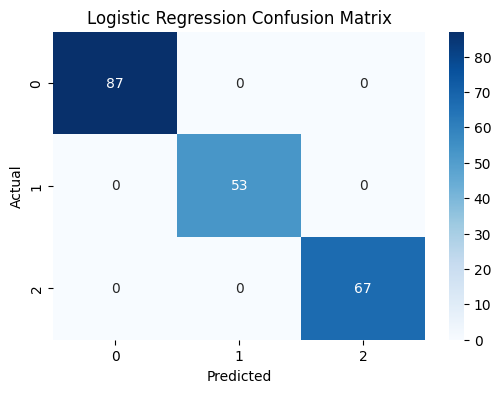

In [19]:
# 5. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# 1. Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_dt = dt_model.predict(X_test)


In [22]:
 # 3. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"✅ Decision Tree Accuracy: {accuracy:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt))   

✅ Decision Tree Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



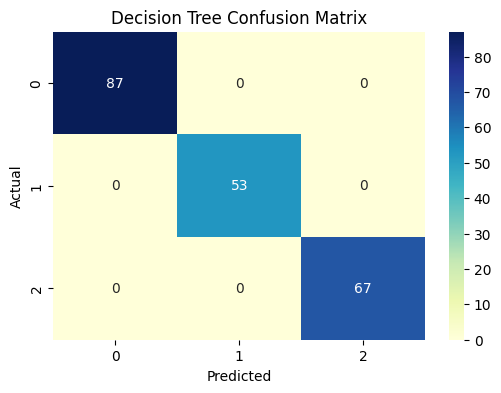

In [23]:
# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

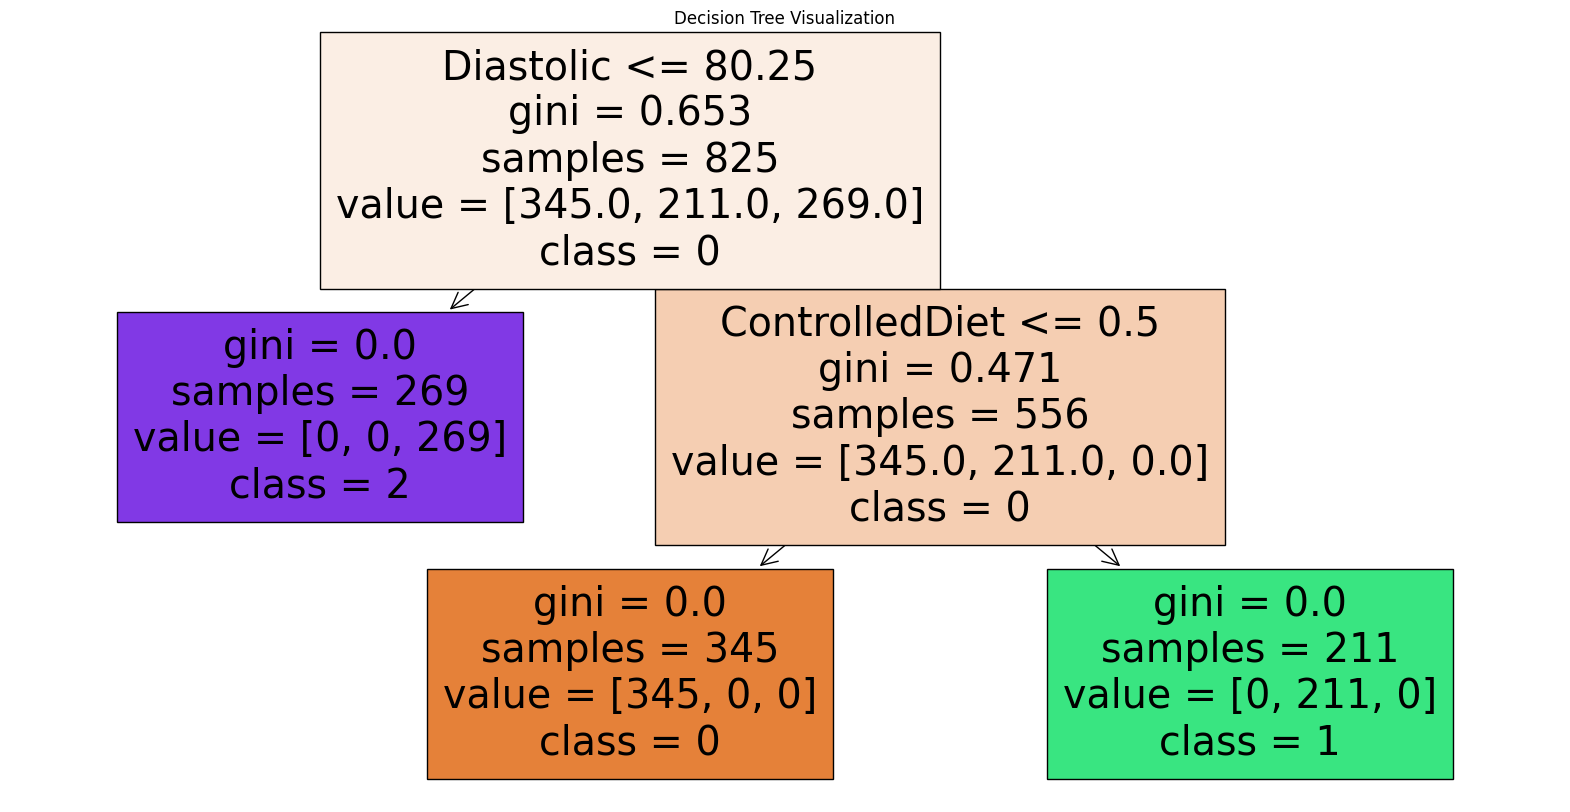

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in dt_model.classes_])
plt.title("Decision Tree Visualization")
plt.show()

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
# 1. Initialize and train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 2. Predict on test set
y_pred_gnb = gnb.predict(X_test)

In [27]:
# 3. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"✅ Gaussian Naive Bayes Accuracy: {accuracy:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred_gnb))
    

✅ Gaussian Naive Bayes Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



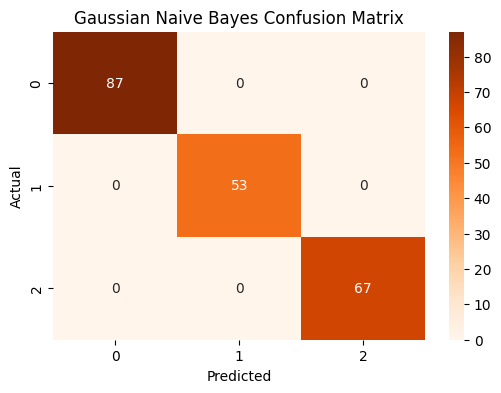

In [28]:
# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Logistic Regression
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Multinomial Naive Bayes (only works if all features are non-negative)
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)


MultinomialNB()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree,
    "Gaussian NB": gnb_model,
    "Multinomial NB": mnb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n🧠 Model: {name}")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



🧠 Model: Logistic Regression
✅ Accuracy: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207

📉 Confusion Matrix:
[[87  0  0]
 [ 0 53  0]
 [ 0  0 67]]

🧠 Model: Decision Tree
✅ Accuracy: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207

📉 Confusion Matrix:
[[87  0  0]
 [ 0 53

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define param grid
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best parameters and score
print("🌳 Best Decision Tree Parameters:", grid_dt.best_params_)
print("✅ Best Accuracy:", grid_dt.best_score_)

# Evaluate best estimator
best_dt = grid_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
print("\nClassification Report for Best Decision Tree:")
print(classification_report(y_test, y_pred_best_dt))

🌳 Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
✅ Best Accuracy: 1.0

Classification Report for Best Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



In [33]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("📦 Best Logistic Regression Parameters:", grid_lr.best_params_)
print("✅ Best Accuracy:", grid_lr.best_score_)

# Evaluate best estimator
best_lr = grid_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
print("\nClassification Report for Best Logistic Regression:")
print(classification_report(y_test, y_pred_best_lr))

C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

📦 Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Best Accuracy: 1.0

Classification Report for Best Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        67

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



In [34]:
import joblib

# Replace 'logistic_model' with your best-performing model
best_model = logistic_model

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

print("✅ Model saved successfully as 'best_model.pkl'")


✅ Model saved successfully as 'best_model.pkl'


In [35]:
# Load the model from file
loaded_model = joblib.load('best_model.pkl')

# Predict using the loaded model
y_loaded_pred = loaded_model.predict(X_test)

# Evaluate to verify
from sklearn.metrics import accuracy_score
print(f"✅ Loaded Model Accuracy: {accuracy_score(y_test, y_loaded_pred):.4f}")

✅ Loaded Model Accuracy: 1.0000


In [36]:
import datetime
filename = f"best_model_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.pkl"
joblib.dump(best_model, filename)
print(f"best_model.pkl")

best_model.pkl


In [38]:
from flask import Flask, render_template, request
import joblib
import numpy as np

# Initialize the Flask app
app = Flask(__name__)

# Load the saved model
model = joblib.load('best_model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Read input values from form
        features = [float(request.form[f'f{i}']) for i in range(1, 14)]  # Assuming 13 features
        features_array = np.array([features])
        
        # Make prediction
        prediction = model.predict(features_array)[0]

        return render_template('index.html', prediction_text=f'Predicted Class: {prediction}')
    except Exception as e:
        return render_template('index.html', prediction_text=f'Error: {str(e)}')

if __name__ == "__main__":
    app.run(debug=True)


ModuleNotFoundError: No module named 'flask'

In [39]:
!pip install flask

   ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
   ----------- --------------------------- 30.7/103.3 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/103.3 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/103.3 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/103.3 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/103.3 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/103.3 kB 660.6 kB/s eta 0:00:01
   ------------------------------ -------- 81.9/103.3 kB 218.5 kB/s eta 0:00:01
   ------------------------------ -------- 81.9/103.3 kB 218.5 kB/s eta 0:00:01
   ---------------------------------- ---- 92.2/103.3 kB 201.8 kB/s eta 0:00:01
   ---------------------------------- ---- 92.2/103.3 kB 201.8 kB/s eta 0:00:01
   -------------------------------------- 103.3/103.3 kB 180.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from flask import Flask, render_template, request
import joblib
import numpy as np

# Initialize the Flask app
app = Flask(__name__)

# Load the saved model
model = joblib.load('best_model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Read input values from form
        features = [float(request.form[f'f{i}']) for i in range(1, 14)]  # Assuming 13 features
        features_array = np.array([features])
        
        # Make prediction
        prediction = model.predict(features_array)[0]

        return render_template('index.html', prediction_text=f'Predicted Class: {prediction}')
    except Exception as e:
        return render_template('index.html', prediction_text=f'Error: {str(e)}')

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [43]:
import shutil

# Absolute destination path
destination = r"C:\Users\risha\OneDrive\Desktop\smartbridge_project\best_model.pkl"

# Move the file from Jupyter root to your folder
shutil.move("best_model.pkl", destination)


'C:\\Users\\risha\\OneDrive\\Desktop\\smartbridge_project\\best_model.pkl'